# Importing necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from ipywidgets import interact
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras import layers, callbacks

In [13]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\Mastercard_stock_history.csv")
df

Date        Open        High         Low       Close     Volume  \
0     2006-05-25    3.748967    4.283869    3.739664    4.279217  395343000   
1     2006-05-26    4.307126    4.348058    4.103398    4.179680  103044000   
2     2006-05-30    4.183400    4.184330    3.986184    4.093164   49898000   
3     2006-05-31    4.125723    4.219679    4.125723    4.180608   30002000   
4     2006-06-01    4.179678    4.474572    4.176887    4.419686   62344000   
...          ...         ...         ...         ...         ...        ...   
3867  2021-10-05  347.121403  348.130138  342.497241  342.776886    4724100   
3868  2021-10-06  339.580960  348.439763  338.682072  348.250000    3712000   
3869  2021-10-07  349.000000  357.899994  349.000000  353.910004    3209200   
3870  2021-10-08  356.000000  360.369995  354.209991  354.959991    2336700   
3871  2021-10-11  353.950012  354.880005  346.899994  347.149994    2766800   

      Dividends  Stock Splits  
0          0.00           0.0  
1          0.00           0.0  
2          0.00           0.0  
3          0.00           0.0  
4          0.00           0.0  
...         ...           ...  
3867       0.00           0.0  
3868       0.00           0.0  
3869       0.44           0.0  
3870       0.00           0.0  
3871       0.00           0.0  

[3872 rows x 8 columns]

# Data Exploration

-To check (rows, columns)

In [14]:
df.shape

(3872, 8)

-To get hold of the basic nature of each columns

In [15]:
df.describe()

Open         High          Low        Close        Volume  \
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03   
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07   
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07   
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05   
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06   
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06   
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07   
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08   

         Dividends  Stock Splits  
count  3872.000000   3872.000000  
mean      0.002329      0.002583  
std       0.025851      0.160706  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.440000     10.000000

-To check the datatypes, the object ones need to be changed (it enables mathematical operations, facilitates statistical analysis)

In [16]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

-To check for null values,(none-found..)

In [17]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

-Date column has been made as the index (easy time-based indexing, aids in time series analysis and forecasting)

In [18]:
df.index=pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)
df

Open        High         Low       Close     Volume  \
Date                                                                    
2006-05-25    3.748967    4.283869    3.739664    4.279217  395343000   
2006-05-26    4.307126    4.348058    4.103398    4.179680  103044000   
2006-05-30    4.183400    4.184330    3.986184    4.093164   49898000   
2006-05-31    4.125723    4.219679    4.125723    4.180608   30002000   
2006-06-01    4.179678    4.474572    4.176887    4.419686   62344000   
...                ...         ...         ...         ...        ...   
2021-10-05  347.121403  348.130138  342.497241  342.776886    4724100   
2021-10-06  339.580960  348.439763  338.682072  348.250000    3712000   
2021-10-07  349.000000  357.899994  349.000000  353.910004    3209200   
2021-10-08  356.000000  360.369995  354.209991  354.959991    2336700   
2021-10-11  353.950012  354.880005  346.899994  347.149994    2766800   

            Dividends  Stock Splits  
Date                                 
2006-05-25       0.00           0.0  
2006-05-26       0.00           0.0  
2006-05-30       0.00           0.0  
2006-05-31       0.00           0.0  
2006-06-01       0.00           0.0  
...               ...           ...  
2021-10-05       0.00           0.0  
2021-10-06       0.00           0.0  
2021-10-07       0.44           0.0  
2021-10-08       0.00           0.0  
2021-10-11       0.00           0.0  

[3872 rows x 7 columns]

-The correlation matrix tells us how strongly/weakly one variable is related to the other

In [19]:
correlation_matrix= df.corr()
correlation_matrix

Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999905  0.999868  0.999785 -0.386222   0.089059   
High          0.999905  1.000000  0.999832  0.999878 -0.384819   0.089429   
Low           0.999868  0.999832  1.000000  0.999904 -0.387965   0.089989   
Close         0.999785  0.999878  0.999904  1.000000 -0.386453   0.090125   
Volume       -0.386222 -0.384819 -0.387965 -0.386453  1.000000  -0.039454   
Dividends     0.089059  0.089429  0.089989  0.090125 -0.039454   1.000000   
Stock Splits -0.004019 -0.003897 -0.003923 -0.003862 -0.004661  -0.001448   

              Stock Splits  
Open             -0.004019  
High             -0.003897  
Low              -0.003923  
Close            -0.003862  
Volume           -0.004661  
Dividends        -0.001448  
Stock Splits      1.000000

# Data Visualization

In [20]:
df_reset_index=df.reset_index()

fig=px.line(df_reset_index, x='Date', y='Close', title='Mastercard stock closing price over time', 
            labels={'Close':'Closing Price', 'Date':'Date'})
fig.update_xaxes(type='category')
fig.show()

-Scatter plot between prices and lagged prices, The graph below shows that there is a positive correlation between the     original prices and the lagged prices which means higher the lagged price, higher the current price.
 Hence this piece of info can be used to predict future prices more accurately, trading strategies, etc

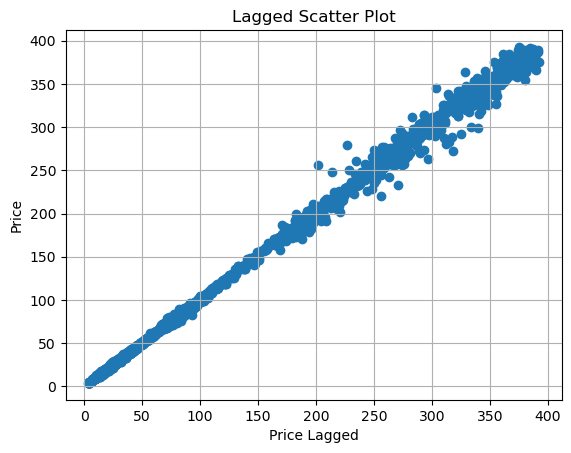

In [21]:
lag = 3
df['Price Lagged'] = df['Open'].shift(lag)

# Create a lag plot
plt.scatter(df['Price Lagged'], df['Open'])
plt.xlabel('Price Lagged')
plt.ylabel('Price')
plt.title('Lagged Scatter Plot')
plt.grid(True)
plt.show()

-Pair plot for key metrics

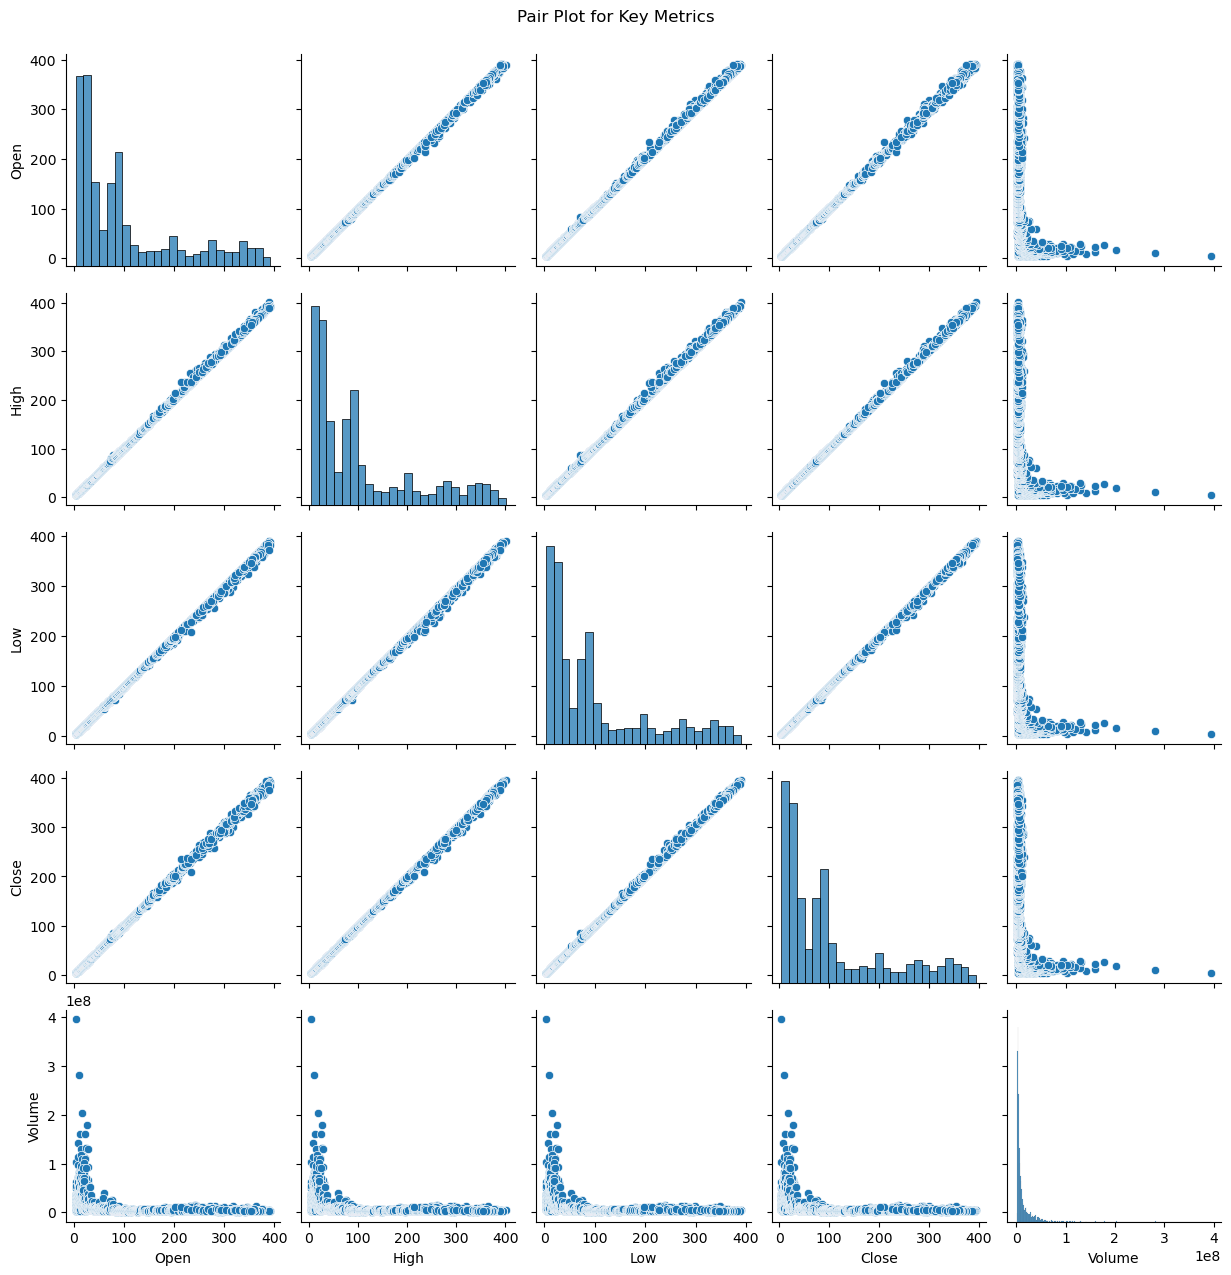

In [22]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], height=2.5)
plt.suptitle('Pair Plot for Key Metrics', y=1.02)
plt.grid()
plt.show()

# Time-Series Analysis

-Finding the moving average

In [23]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

-It helps to smooth out short-term fluctuations and highlight long-term trends or patterns in the data.

In [24]:
rolling_mean

Date
2006-05-25           NaN
2006-05-26           NaN
2006-05-30           NaN
2006-05-31           NaN
2006-06-01           NaN
                 ...    
2021-10-05    348.600217
2021-10-06    348.164434
2021-10-07    348.006539
2021-10-08    348.091382
2021-10-11    347.820344
Name: Close, Length: 3872, dtype: float64

-It measures the dispersion or variability of data points around the rolling mean.
 A higher rolling standard deviation indicates greater variability or volatility in the data, while a lower standard  deviation suggests more stability.

In [25]:
rolling_std

Date
2006-05-25         NaN
2006-05-26         NaN
2006-05-30         NaN
2006-05-31         NaN
2006-06-01         NaN
                ...   
2021-10-05    6.473496
2021-10-06    6.010974
2021-10-07    5.784059
2021-10-08    5.868994
2021-10-11    5.711143
Name: Close, Length: 3872, dtype: float64

-The rolling STD basically shows how bumpy the ride for Mastercard stock has been over the past years

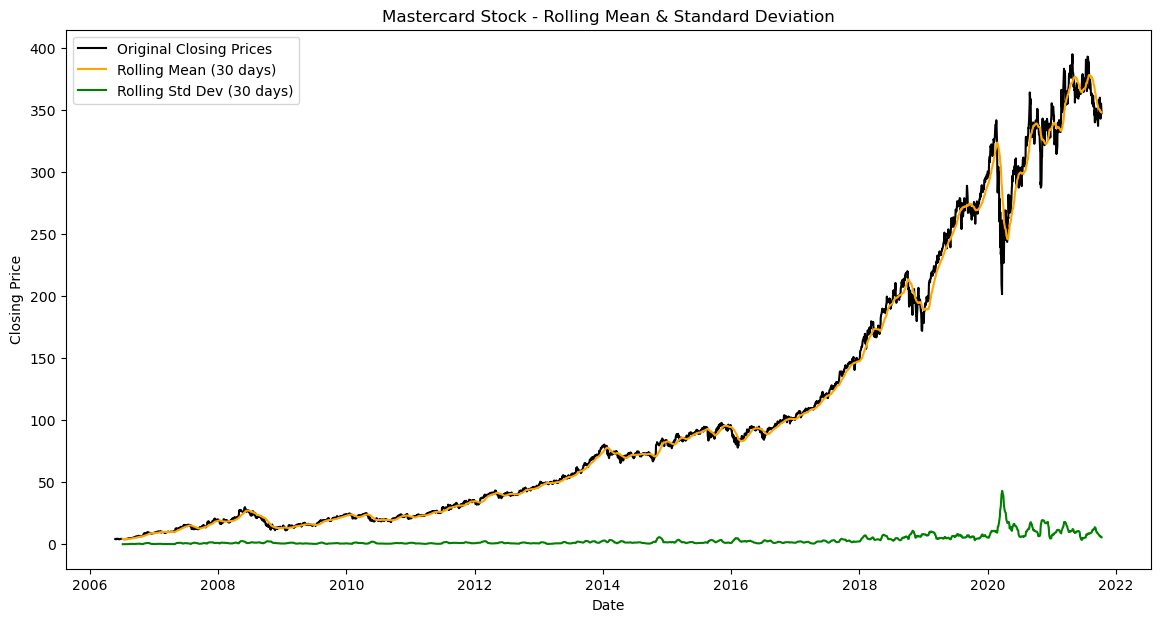

In [26]:
plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Close'], label='Original Closing Prices', color='black')
plt.plot(df.index, rolling_mean, label='Rolling Mean (30 days)', color='orange')
plt.plot(df.index, rolling_std, label='Rolling Std Dev (30 days)', color='green')

plt.title('Mastercard Stock - Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

-The code snippet provided generates histograms for each numerical column in the DataFrame df

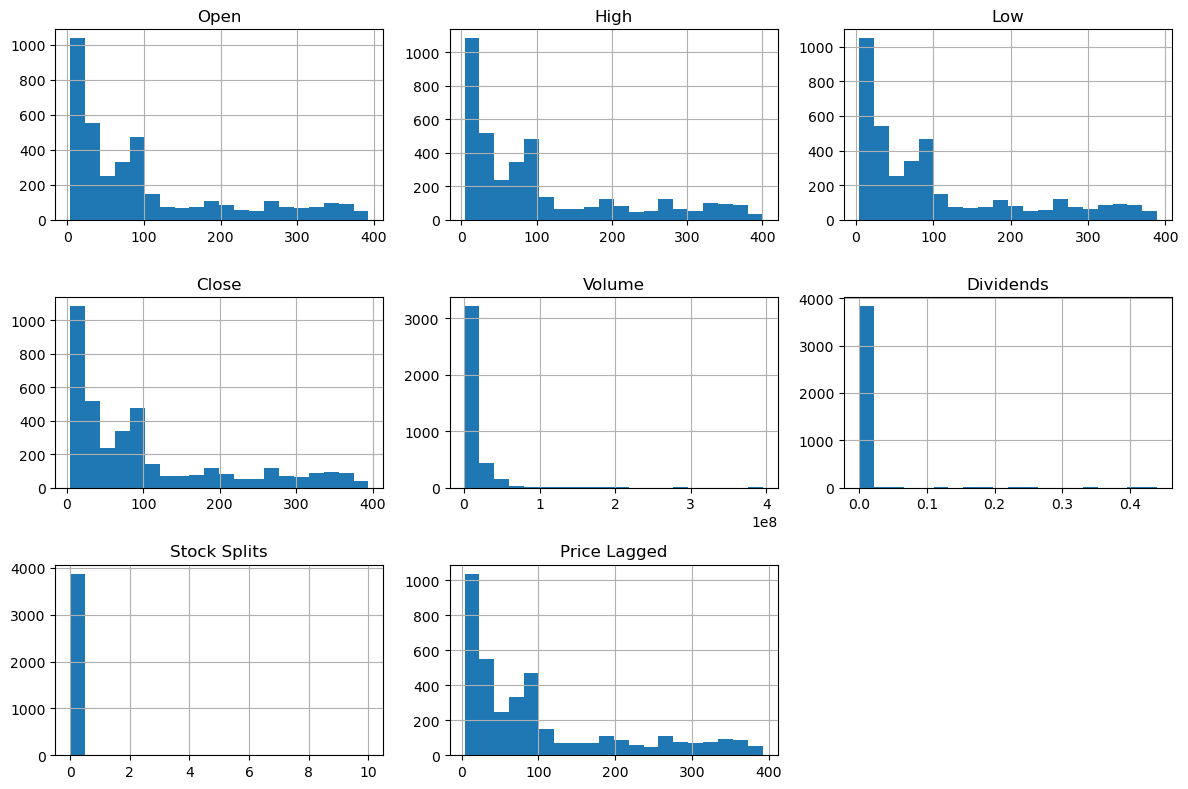

In [27]:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


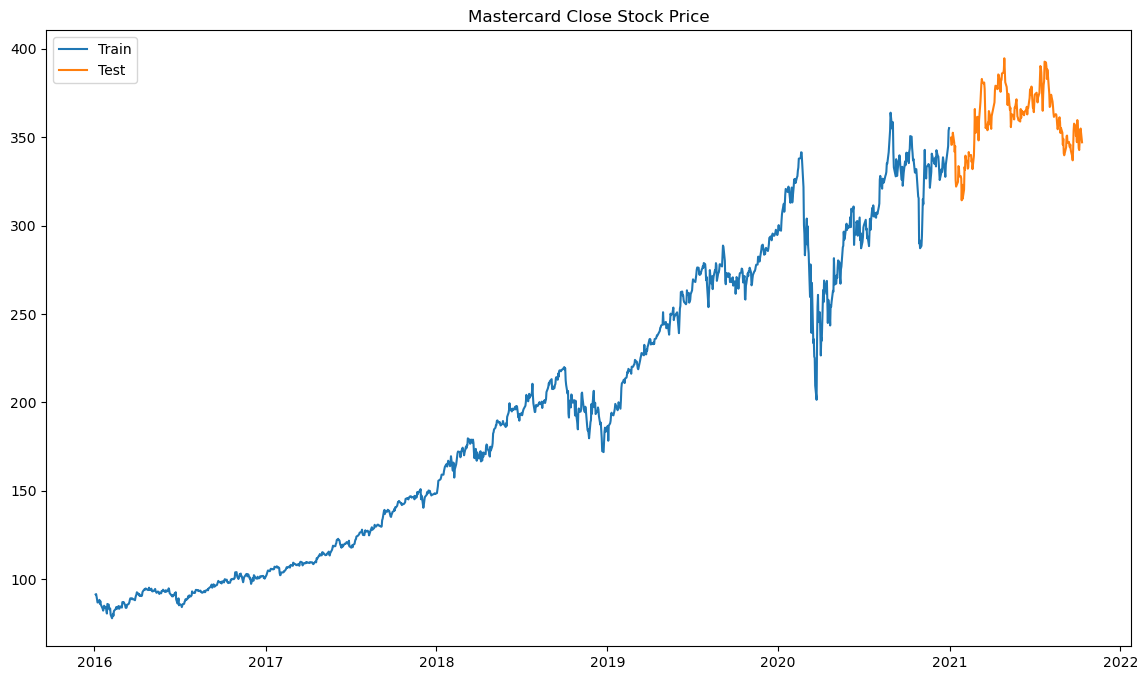

In [28]:
train = df[(df.index.year<2021) & (df.index.year>=2016)]
test = df[df.index.year>=2021]

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train['Close'].values.reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.legend()
plt.title('Mastercard Close Stock Price')
plt.show()


In [30]:
X_train = []
y_train = []
for i in range(80,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-80:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


In [32]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    layers.Dropout(0.2),
    
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),
    
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),

    layers.LSTM(units=50),
    layers.Dropout(0.2),
    
    layers.Dense(units=1),
])

model.compile(optimizer='adam',loss='mse', metrics=['mse','mae', 'mape'])

In [33]:
early_stopping = callbacks.EarlyStopping(
    patience=6,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(X_train,y_train,epochs=100,batch_size=24, callbacks=[early_stopping])

Epoch 1/100


50/50 [==============================] - 13s 80ms/step - loss: 0.0288 - mse: 0.0288 - mae: 0.1066 - mape: 37.5588
Epoch 2/100
50/50 [==============================] - 4s 78ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0478 - mape: 13.1570
Epoch 3/100
50/50 [==============================] - 4s 83ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0506 - mape: 13.9477
Epoch 4/100
50/50 [==============================] - 4s 82ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0468 - mape: 12.3298
Epoch 5/100
50/50 [==============================] - 4s 82ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0397 - mape: 10.7653
Epoch 6/100
50/50 [==============================] - 4s 85ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0406 - mape: 10.5907
Epoch 7/100
50/50 [==============================] - 4s 85ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0452 - mape: 12.3120
Epoch 8/100
50/50 [==============================] - 4s 88ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0404 - mape: 12.03

In [34]:
history_frame = pd.DataFrame(history.history)

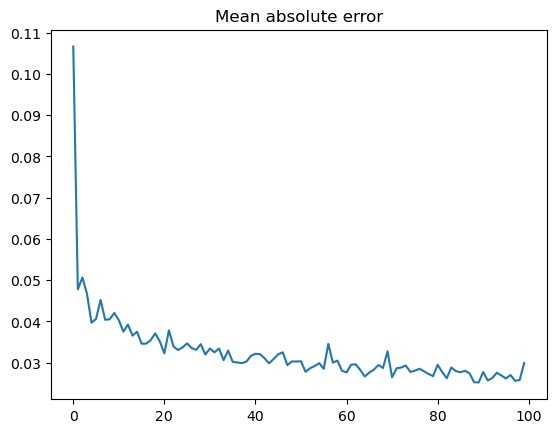

In [36]:
plt.plot(history_frame.loc[:, ['mae']])
plt.title('Mean absolute error')
plt.show()

In [37]:
dataset_total = df['Close']
inputs = dataset_total[len(dataset_total)-len(test['Close'].values) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [38]:
X_test = []

for i in range(80,len(inputs)):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 2s 28ms/step


In [39]:
predictions = pd.DataFrame()
predictions['Actuals'] = test['Close']
predictions['Predictions'] = predicted_stock_price

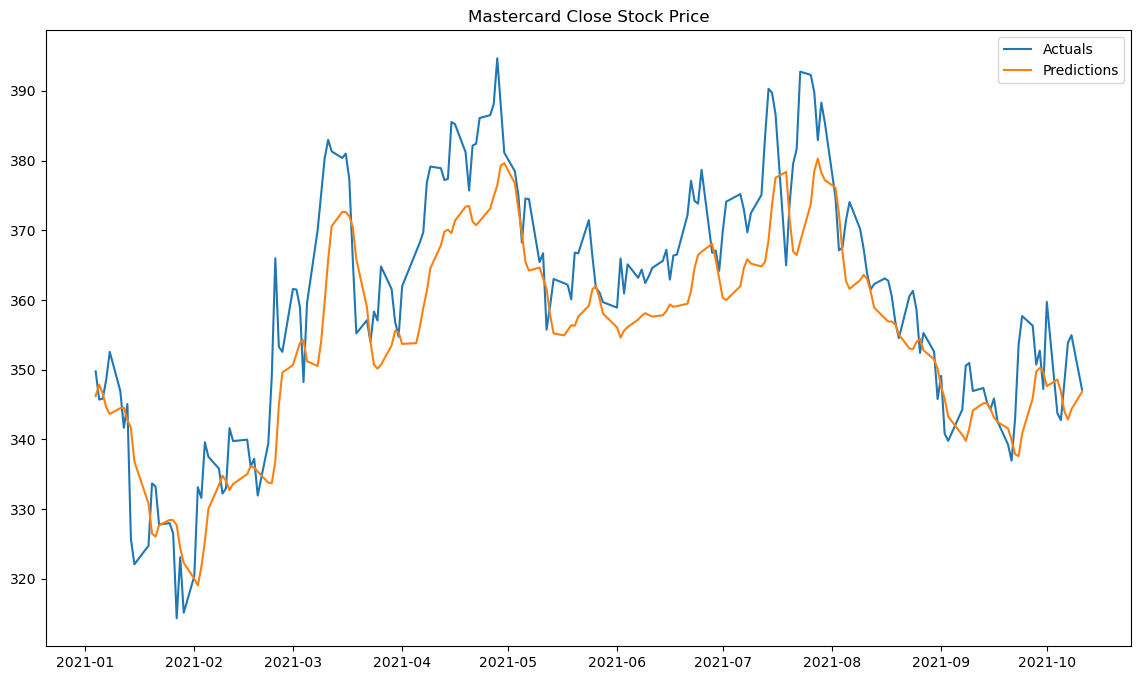

In [40]:
plt.figure(figsize=(14,8))
plt.title('Mastercard Close Stock Price')
plt.plot(predictions['Actuals'], label='Actuals')
plt.plot(predictions['Predictions'], label='Predictions')
plt.legend()
plt.show()